##### Bellman-Ford:

The Bellman-Ford algorithm is best suited to find the shortest paths in a directed graph, with one or more negative edge weights, from the source vertex to all other vertices.

Imagine you have a map with different cities connected by roads, each road having a certain distance. The Bellman–Ford algorithm is like a guide that helps you find the shortest path from one city to all other cities, even if some roads have negative lengths. It’s like a GPS for computers, useful for figuring out the quickest way to get from one point to another in a network. In this article, we’ll take a closer look at how this algorithm works and why it’s so handy in solving everyday problems.

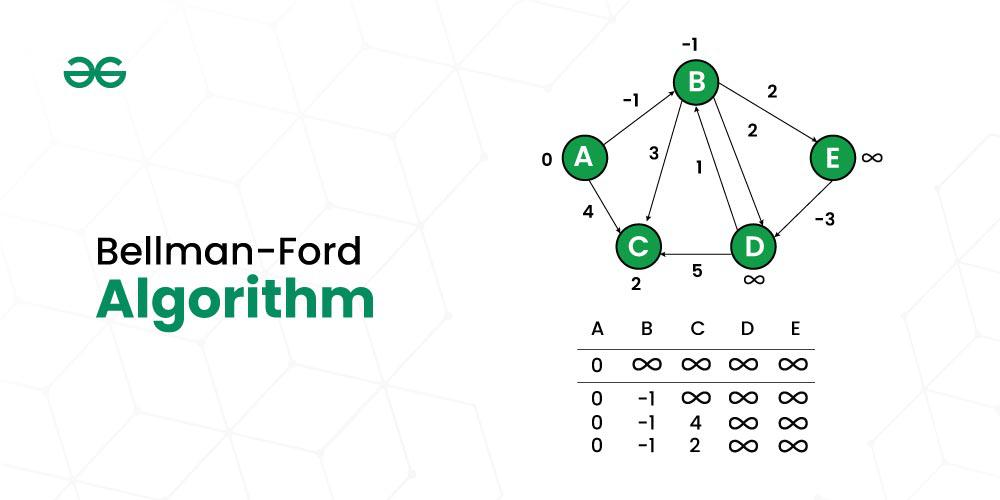

In [10]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/Bellman-Ford-Algorithm.jpg")

#### Bellman-Ford Algorithm

Bellman-Ford is a single source shortest path algorithm that determines the shortest path between a given source vertex and every other vertex in a graph. This algorithm can be used on both weighted and unweighted graphs.

A Bellman-Ford algorithm is also guaranteed to find the shortest path in a graph, similar to Dijkstra’s algorithm. Although Bellman-Ford is slower than Dijkstra’s algorithm, it is capable of handling graphs with negative edge weights, which makes it more versatile. The shortest path cannot be found if there exists a negative cycle in the graph. If we continue to go around the negative cycle an infinite number of times, then the cost of the path will continue to decrease (even though the length of the path is increasing). As a result, Bellman-Ford is also capable of detecting negative cycles, which is an important feature.

#### The idea behind Bellman Ford Algorithm:

The Bellman-Ford algorithm’s primary principle is that it starts with a single source and calculates the distance to each node. The distance is initially unknown and assumed to be infinite, but as time goes on, the algorithm relaxes those paths by identifying a few shorter paths. Hence it is said that Bellman-Ford is based on “Principle of Relaxation“.

#### Principle of Relaxation of Edges for Bellman-Ford:

- It states that for the graph having N vertices, all the edges should be relaxed N-1 times to compute the single source shortest path.

- In order to detect whether a negative cycle exists or not, relax all the edge one more time and if the shortest distance for any node reduces then we can say that a negative cycle exists. In short if we relax the edges N times, and there is any change in the shortest distance of any node between the N-1th and Nth relaxation than a negative cycle exists, otherwise not exist.


#### Why Relaxing Edges N-1 times, gives us Single Source Shortest Path?

In the worst-case scenario, a shortest path between two vertices can have at most N-1 edges, where N is the number of vertices. This is because a simple path in a graph with N vertices can have at most N-1 edges, as it’s impossible to form a closed loop without revisiting a vertex.

By relaxing edges N-1 times, the Bellman-Ford algorithm ensures that the distance estimates for all vertices have been updated to their optimal values, assuming the graph doesn’t contain any negative-weight cycles reachable from the source vertex. If a graph contains a negative-weight cycle reachable from the source vertex, the algorithm can detect it after N-1 iterations, since the negative cycle disrupts the shortest path lengths.

In summary, relaxing edges N-1 times in the Bellman-Ford algorithm guarantees that the algorithm has explored all possible paths of length up to N-1, which is the maximum possible length of a shortest path in a graph with N vertices. This allows the algorithm to correctly calculate the shortest paths from the source vertex to all other vertices, given that there are no negative-weight cycles.

#### Why Does the Reduction of Distance in the N’th Relaxation Indicates the Existence of a Negative Cycle?

As previously discussed, achieving the single source shortest paths to all other nodes takes N-1 relaxations. If the N’th relaxation further reduces the shortest distance for any node, it implies that a certain edge with negative weight has been traversed once more. It is important to note that during the N-1 relaxations, we presumed that each vertex is traversed only once. However, the reduction of distance during the N’th relaxation indicates revisiting a vertex.

#### Working of Bellman-Ford Algorithm to Detect the Negative cycle in the graph:

Let’s suppose we have a graph which is given below and we want to find whether there exists a negative cycle or not using Bellman-Ford.

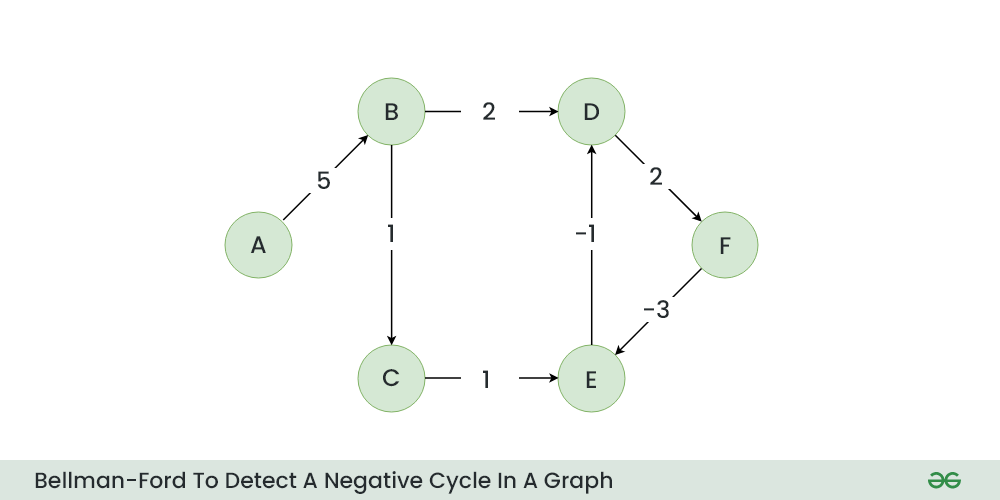

In [9]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/bellman.png")

Step 1: Initialize a distance array Dist[] to store the shortest distance for each vertex from the source vertex. Initially distance of source will be 0 and 

Distance of other vertices will be INFINITY.

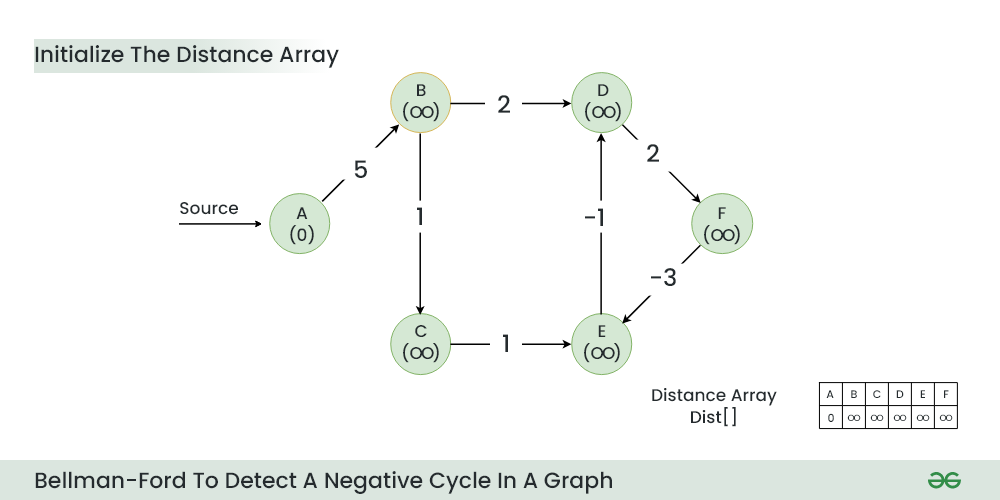

In [7]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/bellman1.png")

Step 2: Start relaxing the edges, during 1st Relaxation:

- Current Distance of B > (Distance of A) + (Weight of A to B) i.e. Infinity > 0 + 5
    - Therefore, Dist[B] = 5

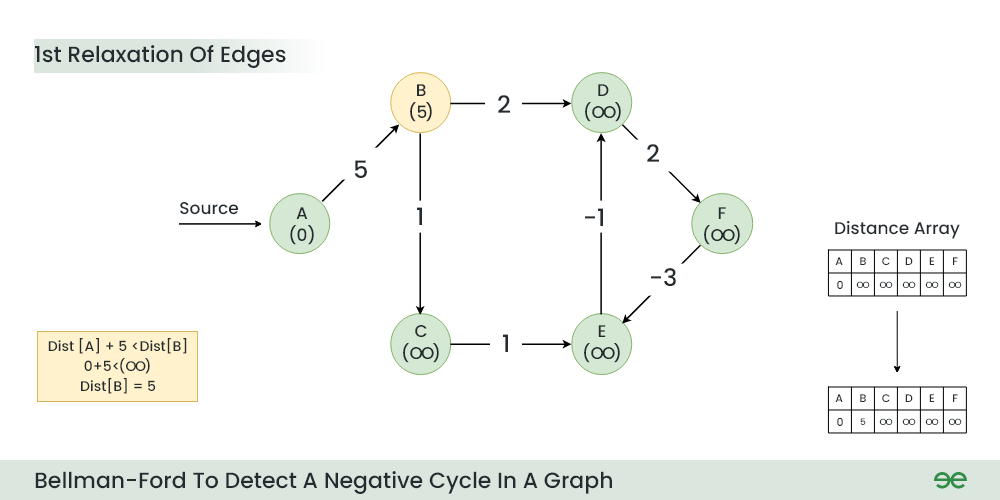

In [8]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/bellman2.png")

Step 3: During 2nd Relaxation:

- Current Distance of D > (Distance of B) + (Weight of B to D) i.e. Infinity > 5 + 2
    - Dist[D] = 7
- Current Distance of C > (Distance of B) + (Weight of B to C) i.e. Infinity > 5 + 1
    - Dist[C] = 6

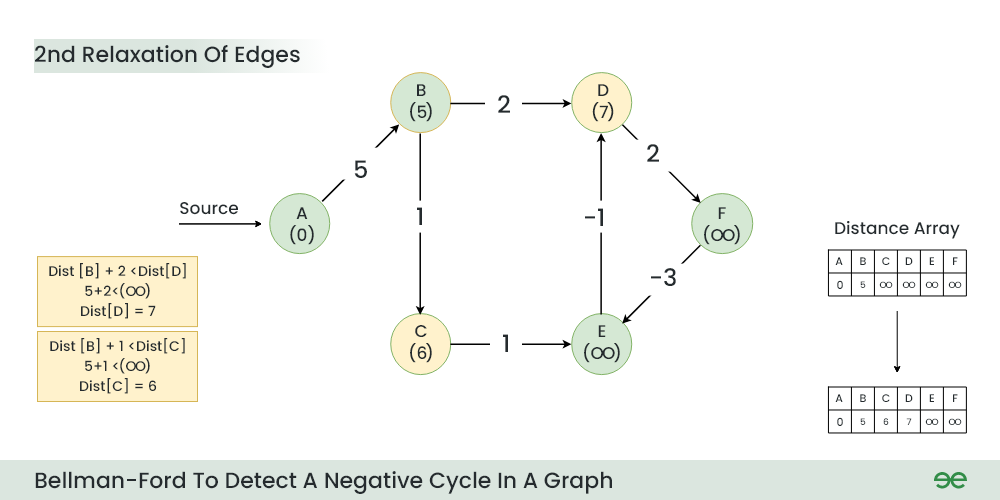

In [6]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/bellman3.png")

Step 4: During 3rd Relaxation:

- Current Distance of F > (Distance of D ) + (Weight of D to F) i.e. Infinity > 7 + 2
    - Dist[F] = 9
- Current Distance of E > (Distance of C ) + (Weight of C to E) i.e. Infinity > 6 + 1
    - Dist[E] = 7

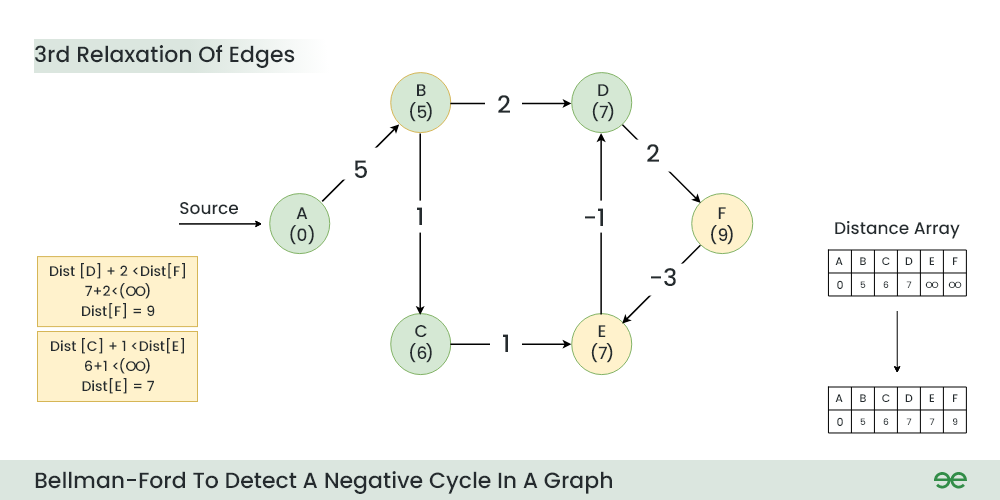

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/bellman4.png")


Step 5: During 4th Relaxation:

- Current Distance of D > (Distance of E) + (Weight of E to D) i.e. 7 > 7 + (-1)
    - Dist[D] = 6
- Current Distance of E > (Distance of F ) + (Weight of F to E) i.e. 7 > 9 + (-3)
    - Dist[E] = 6

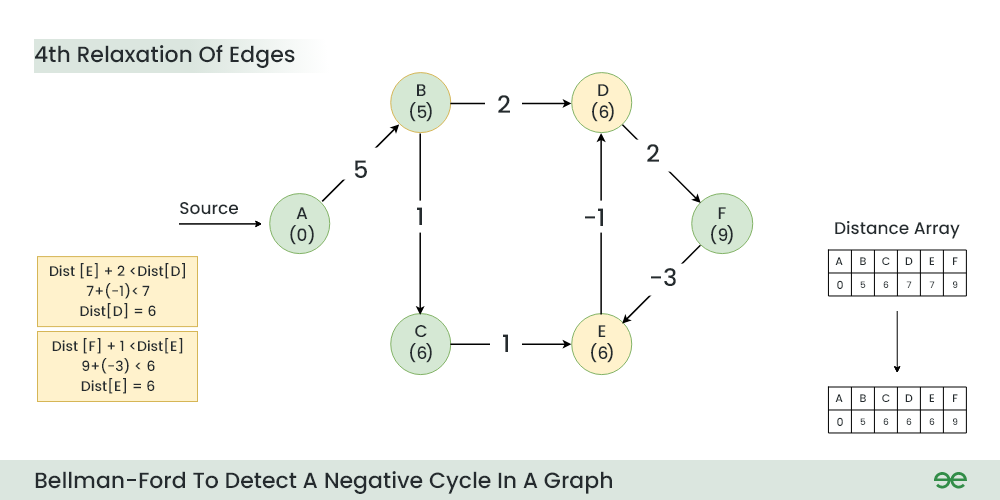

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/bellman5.png")

Step 6: During 5th Relaxation:

- Current Distance of F > (Distance of D) + (Weight of D to F) i.e. 9 > 6 + 2
    - Dist[F] = 8
- Current Distance of D > (Distance of E ) + (Weight of E to D) i.e. 6 > 6 + (-1)
    - Dist[D] = 5
- Since the graph h 6 vertices, So during the 5th relaxation the shortest distance for all the vertices should have been calculated.

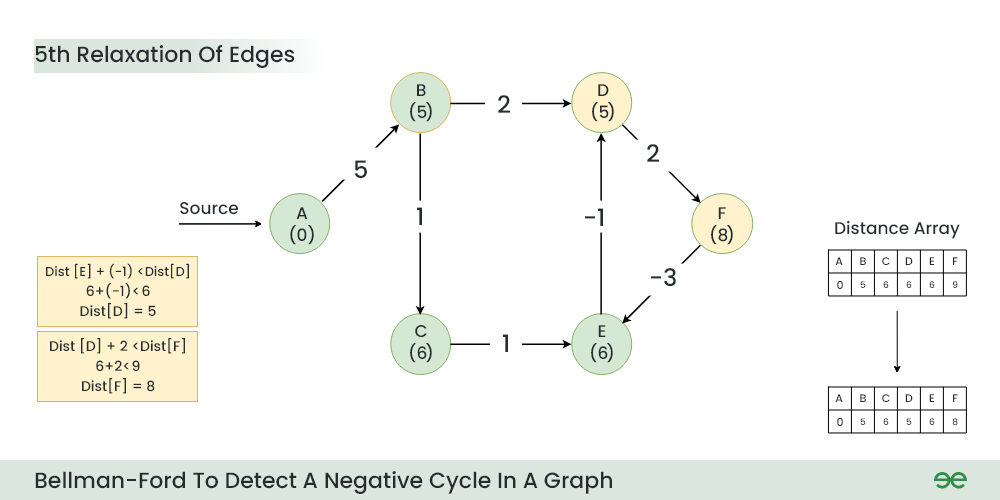

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/bellman6.png")

Step 7: Now the final relaxation i.e. the 6th relaxation should indicate the presence of negative cycle if there is any changes in the distance array of 5th relaxation.

During the 6th relaxation, following changes can be seen:

- Current Distance of E > (Distance of F) + (Weight of F to E) i.e. 6 > 8 + (-3)
    - Dist[E]=5
- Current Distance of F > (Distance of D ) + (Weight of D to F) i.e. 8 > 5 + 2
    - Dist[F]=7

Since, we observer changes in the Distance array Hence ,we can conclude the presence of a negative cycle in the graph.

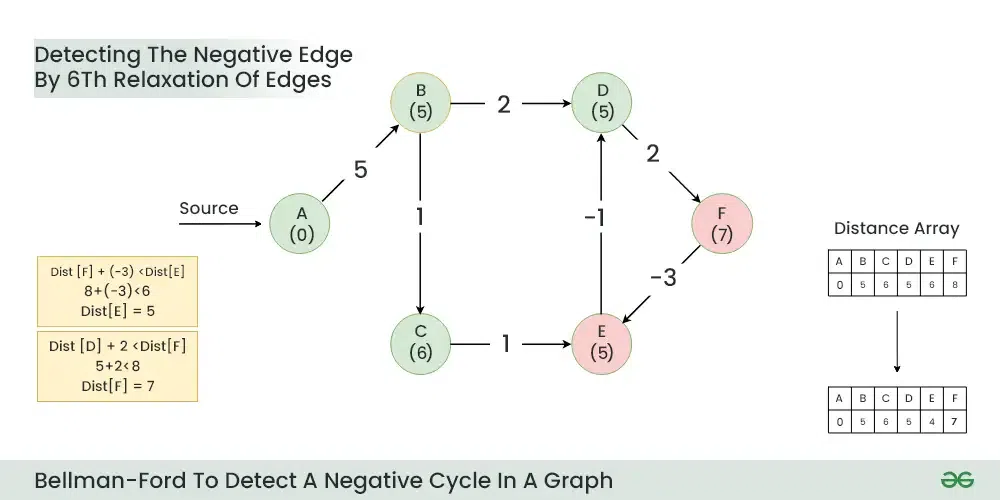

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/bellman7.jpeg")

Result: A negative cycle (D->F->E) exists in the graph.

#### Algorithm to Find Negative Cycle in a Directed Weighted Graph Using Bellman-Ford:

- Initialize distance array dist[] for each vertex ‘v‘ as dist[v] = INFINITY.
- Assume any vertex (let’s say ‘0’) as source and assign dist = 0.
- Relax all the edges(u,v,weight) N-1 times as per the below condition:
    - dist[v] = minimum(dist[v], distance[u] + weight)
- Now, Relax all the edges one more time i.e. the Nth time and based on the below two cases we can detect the negative cycle:
    - Case 1 (Negative cycle exists): For any edge(u, v, weight), if dist[u] + weight < dist[v]
    - Case 2 (No Negative cycle) : case 1 fails for all the edges.

#### Handling Disconnected Graphs in the Algorithm:

The above algorithm and program might not work if the given graph is disconnected. It works when all vertices are reachable from source vertex 0.
To handle disconnected graphs, we can repeat the above algorithm for vertices having distance = INFINITY, or simply for the vertices that are not visited.

In [1]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    def printArr(self, dist):
        print("Vertex Distance from Source")
        for i in range(self.V):
            print("{0}\t\t{1}".format(i, dist[i]))

    def BellmanFord(self, src):
        dist = [float("Inf")] * self.V
        dist[src] = 0
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        self.printArr(dist)

if __name__ == '__main__':
    g = Graph(5)
    g.addEdge(0, 1, -1)
    g.addEdge(0, 2, 4)
    g.addEdge(1, 2, 3)
    g.addEdge(1, 3, 2)
    g.addEdge(1, 4, 2)
    g.addEdge(3, 2, 5)
    g.addEdge(3, 1, 1)
    g.addEdge(4, 3, -3)
    g.BellmanFord(0)


Vertex Distance from Source
0		0
1		-1
2		2
3		-2
4		1


#### Complexity Analysis of Bellman-Ford Algorithm:

##### Time Complexity when graph is connected:

Best Case: O(E), when distance array after 1st and 2nd relaxation are same , we can simply stop further processing

Average Case: O(V*E)

Worst Case: O(V*E)

##### Time Complexity when graph is disconnected:

All the cases: O(E*(V^2))

Auxiliary Space: O(V), where V is the number of vertices in the graph.

#### Bellman Ford’s Algorithm Applications:

- Network Routing: Bellman-Ford is used in computer networking to find the shortest paths in routing tables, helping data packets navigate efficiently across networks.
- GPS Navigation: GPS devices use Bellman-Ford to calculate the shortest or fastest routes between locations, aiding navigation apps and devices.
- Transportation and Logistics: Bellman-Ford’s algorithm can be applied to determine the optimal paths for vehicles in transportation and logistics, minimizing fuel consumption and travel time.
- Game Development: Bellman-Ford can be used to model movement and navigation within virtual worlds in game development, where different paths may have varying costs or obstacles.
- Robotics and Autonomous Vehicles: The algorithm aids in path planning for robots or autonomous vehicles, considering obstacles, terrain, and energy consumption.

#### Drawback of Bellman Ford’s Algorithm:

Bellman-Ford algorithm will fail if the graph contains any negative edge cycle.

In [1]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight
            #self.adj_matrix[v][u] = weight  # For undirected graph

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def bellman_ford(self, start_vertex_data):
        start_vertex = self.vertex_data.index(start_vertex_data)
        distances = [float('inf')] * self.size
        distances[start_vertex] = 0

        for i in range(self.size - 1):
            for u in range(self.size):
                for v in range(self.size):
                    if self.adj_matrix[u][v] != 0:
                        if distances[u] + self.adj_matrix[u][v] < distances[v]:
                            distances[v] = distances[u] + self.adj_matrix[u][v]
                            print(f"Relaxing edge {self.vertex_data[u]}->{self.vertex_data[v]}, Updated distance to {self.vertex_data[v]}: {distances[v]}")

        return distances

g = Graph(5)

g.add_vertex_data(0, 'A')
g.add_vertex_data(1, 'B')
g.add_vertex_data(2, 'C')
g.add_vertex_data(3, 'D')
g.add_vertex_data(4, 'E')

g.add_edge(3, 0, 4)  
g.add_edge(3, 2, 7)  
g.add_edge(3, 4, 3) 
g.add_edge(0, 2, 4)  
g.add_edge(2, 0, -3)
g.add_edge(0, 4, 5) 
g.add_edge(4, 2, 3)
g.add_edge(1, 2, -4) 
g.add_edge(4, 1, 2) 

print("\nThe Bellman-Ford Algorithm starting from vertex D:")
distances = g.bellman_ford('D')
for i, d in enumerate(distances):
    print(f"Distance from D to {g.vertex_data[i]}: {d}")
    


The Bellman-Ford Algorithm starting from vertex D:
Relaxing edge D->A, Updated distance to A: 4
Relaxing edge D->C, Updated distance to C: 7
Relaxing edge D->E, Updated distance to E: 3
Relaxing edge E->B, Updated distance to B: 5
Relaxing edge E->C, Updated distance to C: 6
Relaxing edge B->C, Updated distance to C: 1
Relaxing edge C->A, Updated distance to A: -2
Distance from D to A: -2
Distance from D to B: 5
Distance from D to C: 1
Distance from D to D: 0
Distance from D to E: 3
